In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_

from category_encoders.binary import BinaryEncoder

from sklearn.feature_selection import SelectPercentile, RFE, SelectKBest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, LinearRegression, LassoCV, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

import pingouin as pg

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error, mean_absolute_error,accuracy_score, recall_score, f1_score, plot_confusion_matrix, precision_score,roc_auc_score

In [86]:
less = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
full = pd.read_csv("Melbourne_housing_FULL.csv")
less

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [87]:
less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [88]:
# less.isna().sum()/len(df)*100

In [89]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [90]:
full.dropna(subset=['Price'], inplace=True)

In [91]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longti

In [92]:
full.isna().sum()/len(full)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bedroom2         23.639300
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
BuildingArea     60.891107
YearBuilt        55.650163
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64

In [93]:
full.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Suburb            0.000000
Address           0.000000 ---> DELETE
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000 ---> DELETE
Date              0.000000 ---> DELETE
Distance          0.002869
Postcode          0.002869 ---> DELETE
Bedroom2         23.573457 ---> DELETE
Bathroom         23.599277 ---> DELETE
Car              25.039447 ---> DELETE
Landsize         33.881286
BuildingArea     60.576068 ---> DELETE
YearBuilt        55.386293 ---> DELETE  ---> PROBABLY IMPORTANT
CouncilArea       0.008607 ---> DELETE
Lattitude        22.882061 ---> DELETE
Longtitude       22.882061 ---> DELETE
Regionname        0.008607
Propertycount     0.008607

Suburb            0.000000 -> impute & binary encoder
Rooms             0.000000
Type              0.000000 -> one hot encoder
Price            21.832057 ---------------------> lgsg di dropna
Method            0.000000 -> one hot encoder
Distance          0.002869 -> impute & scalling
Landsize         33.881286 -> impute & scalling
Regionname        0.008607 -> impute & binary encoder
Propertycount     0.008607 -> impute & scalling

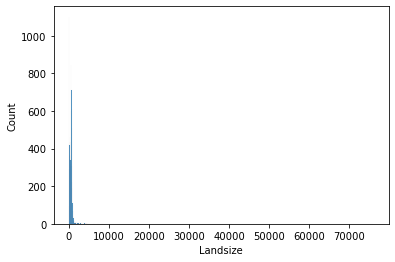

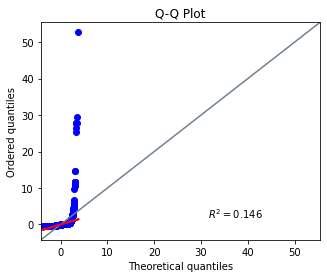

In [94]:
sns.histplot(X_train['Landsize'])
pg.qqplot(X_train['Landsize'], dist='norm')

In [95]:
landsize_Q1=X_train['Landsize'].quantile(0.25)
landsize_Q3 =X_train['Landsize'].quantile(0.75)
landsize_IQR = landsize_Q3 - landsize_Q1
upper_whis_landsize = landsize_Q3+1.5*landsize_IQR
upper_whis_landsize

1330.5

In [96]:
X_train[X_train['Landsize']<upper_whis_landsize].value_counts()

Suburb            Rooms  Type  Method  Distance  Landsize  Regionname             Propertycount
South Yarra       2      u     S       3.3       0.0       Southern Metropolitan  14887.0          20
Hawthorn          2      u     S       4.6       0.0       Southern Metropolitan  11308.0          16
Elwood            2      u     S       7.7       0.0       Southern Metropolitan  8989.0           13
South Yarra       1      u     S       3.3       0.0       Southern Metropolitan  14887.0          13
St Kilda          2      u     S       6.1       0.0       Southern Metropolitan  13240.0          11
                                                                                                   ..
Newport           3      t     S       8.4       224.0     Western Metropolitan   5498.0            1
                                                 283.0     Western Metropolitan   5498.0            1
                                                 575.0     Western Metropolitan   5498.0

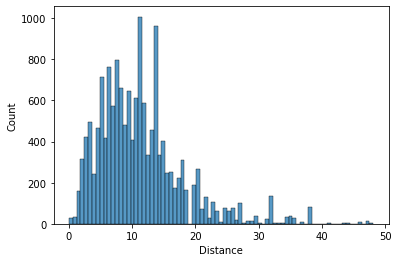

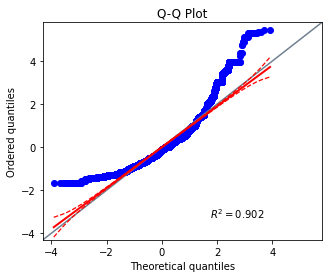

In [98]:
sns.histplot(X_train['Distance'])
pg.qqplot(X_train['Distance'], dist='norm')

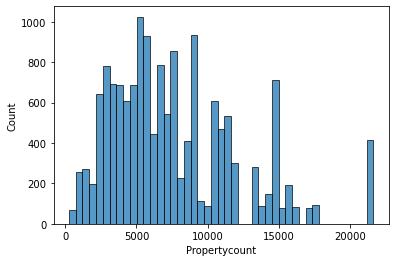

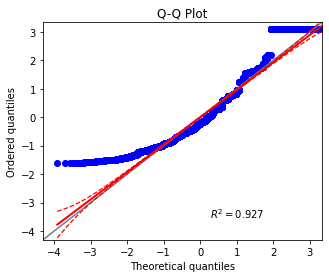

In [99]:

sns.histplot(X_train['Propertycount'])
pg.qqplot(X_train['Propertycount'], dist='norm')

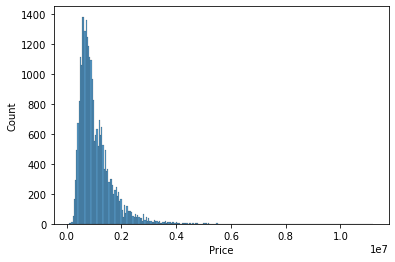

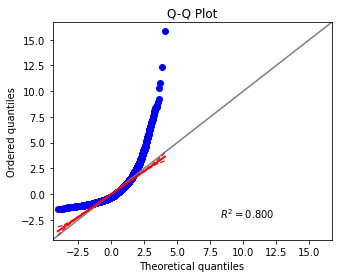

In [100]:
sns.histplot(y)
pg.qqplot(y, dist='norm')

In [101]:
y_Q1= y.quantile(0.25)
y_Q3 = y.quantile(0.75)
y_IQR = y_Q3 - y_Q1
upper_whis_y = y_Q3+1.5*y_IQR
upper_whis_y

2285000.0

In [102]:
j2 = [i for i in y if i > upper_whis_y]
len(j2)

1278

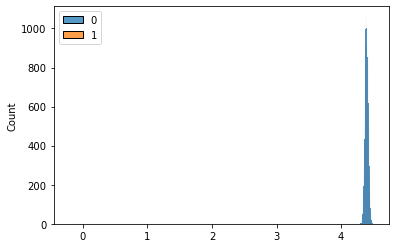

In [103]:
from scipy.stats import boxcox
tdata = boxcox(y)
sns.histplot(tdata)

In [114]:
tdata

0    [4.421919684961844, 4.404535199675763, 4.42144...
1                                            -0.215572
dtype: object

In [112]:
tdata = pd.Series(tdata)
tdata.shape

(2,)

In [104]:
X_train.describe()

,Rooms,Distance,Landsize,Propertycount
count,15326.000000,15325.000000,10124.000000,15323.000000
mean,2.988842,11.248568,554.104702,7616.154930
std,0.959237,6.777356,1429.960696,4535.258372
min,1.000000,0.000000,0.000000,249.000000
25%,2.000000,6.400000,218.000000,4380.000000
50%,3.000000,10.400000,510.000000,6763.000000
75%,4.000000,14.000000,663.000000,10412.000000
max,16.000000,48.100000,76000.000000,21650.000000


In [105]:
y_train.describe()

count    1.532600e+04
mean     1.049758e+06
std      6.428579e+05
min      1.120000e+05
25%      6.310000e+05
50%      8.700000e+05
75%      1.299500e+06
max      1.120000e+07
Name: Price, dtype: float64

In [106]:
y_train.median()

870000.0

In [115]:
X = full.drop(columns=[ 'Address' ,'SellerG',
       'Date', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'BuildingArea', 'YearBuilt', 'Price','CouncilArea', 'Lattitude',
       'Longtitude'])

# y = full['Price']
y = tdata[0]

In [116]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                  y,                                                    
                                                  random_state =2020)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,                                                    
                                                  random_state =2020)

In [117]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

binary_encoder_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

numerical_encoder_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('minmax_scale', MinMaxScaler())
])

transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop= 'first'), ['Type','Method']),
    ('binary_encoder', binary_encoder_pipeline, ['Regionname','Suburb']),
    ('num_encoder', numerical_encoder_pipeline,['Propertycount','Landsize','Distance'])
    
], remainder = 'passthrough')

Suburb            0.000000 -> impute & binary encoder <br>
Rooms             0.000000 <br>
Type              0.000000 -> one hot encoder <br>
Price            21.832057 ---------------------> lgsg di dropna <br>
Method            0.000000 -> one hot encoder <br>
Distance          0.002869 -> impute & scalling <br>
Landsize         33.881286 -> impute & scalling<br>
Regionname        0.008607 -> impute & binary encoder <br>
Propertycount     0.008607 -> impute & scalling

In [118]:
skfold = StratifiedKFold(n_splits = 5)  # supaya mecah 1 sama 0 nya bisa sama rationya, jadi pake stratified kfold
tree = DecisionTreeRegressor(criterion='mse', max_depth = 10, random_state=2020)

estimator = Pipeline([
    ('preprocess', transformer),
    ('clf',tree)
])

In [119]:
model_cv = cross_val_score(estimator, X_train_val, y_train_val, cv=skfold, verbose=1)

print('cv score', model_cv)
print('cv score mean', model_cv.mean())


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [ ]:
estimator.fit(X_train_val, y_train_val)
y_pred_default = estimator.predict(X_test)

from sklearn.metrics import explained_variance_score, r2_score

explained_variance_score(y_test, y_pred_default)

In [ ]:
r2_score(y_test, y_pred_default)

In [ ]:
mean_squared_error(y_test, y_pred_default)

In [ ]:
mean_absolute_error(y_test, y_pred_default)

In [ ]:
residual = y_test - y_pred_default

sns.scatterplot(y_pred_default, residual)
plt.axhline(0)

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot((y_test - y_pred_default))

In [ ]:
# at_columns_fill_miss = ['PoolQC', 'Alley']
# cat_columns_fill_freq = ['Street', 'MSZoning', 'LandContour']
# cat_columns_ord = ['Street', 'Alley', 'PoolQC']
# ord_mapping = [['Pave', 'Grvl'],                          # Street
#                ['missing_value', 'Pave', 'Grvl'],         # Alley
#                ['missing_value', 'Fa', 'TA', 'Gd', 'Ex']  # PoolQC
# ]
# cat_columns_onehot = ['MSZoning', 'LandContour']


# imputer_cat_pipeline = ColumnTransformer([
#         ('imp_miss', SimpleImputer(strategy='constant'), cat_columns_fill_miss),  # fill_value='missing_value' by default
#         ('imp_freq', SimpleImputer(strategy='most_frequent'), cat_columns_fill_freq),
# ])

# encoder_cat_pipeline = ColumnTransformer([
#         ('ordinal', OrdinalEncoder(categories=ord_mapping), cat_columns_ord),
#         ('pass_ord', OneHotEncoder(), cat_columns_onehot),
# ])

# cat_pipeline = Pipeline([
#         ('imp_cat', imputer_cat_pipeline),
#         ('cat_encoder', encoder_cat_pipeline),
# ])

In [ ]:
full.describe(include='object')

binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'NC')),
    ('binary', BinaryEncoder())
])

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary_pipe', binary_encoder_pipeline, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

# ilangin outliers
# gridsearch
# nambahin bbrp model
# ensemble method